In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [30]:
full_data = pd.read_csv(r'06_03_21_5CB_SDS_Blanked')

wavelength_columns = [col for col in full_data.columns if 'nm' in col]
wavelengths = [float(wavelength.replace("nm","")) for wavelength in wavelength_columns]
full_spectra = full_data[wavelength_columns]
full_data

,UID,Labware,Slot,Well,5CB concentration wtf,SDS concentration wtf,ethanol concentration wtf,water concentration wtf,5CB amount mass g,5CB amount volume uL,...,710.0nm,720.0nm,730.0nm,740.0nm,750.0nm,760.0nm,770.0nm,780.0nm,790.0nm,800.0nm
0,S2_B1_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B1,0.00025,0.0000,0.1,0.89975,0.000162,0.160891,...,1.020,0.990,0.961,0.932,0.905,0.878,0.853,0.827,0.803,0.780
1,S2_B2_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B2,0.00025,0.0000,0.2,0.79975,0.000162,0.160891,...,0.334,0.329,0.323,0.318,0.312,0.308,0.304,0.300,0.296,0.293
2,S2_B3_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B3,0.00025,0.0000,0.3,0.69975,0.000162,0.160891,...,0.258,0.253,0.248,0.243,0.238,0.233,0.228,0.224,0.220,0.215
3,S2_B4_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B4,0.00025,0.0000,0.4,0.59975,0.000162,0.160891,...,0.002,0.003,0.004,0.006,0.006,0.006,0.006,0.007,0.007,0.007
4,S2_B5_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,2.0,B5,0.00025,0.0000,0.5,0.49975,0.000162,0.160891,...,0.003,0.004,0.005,0.005,0.005,0.004,0.005,0.005,0.005,0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,S5_A5_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A5,0.00100,0.0005,0.4,0.59850,0.000650,0.643564,...,0.000,0.001,0.001,0.002,0.002,0.001,0.001,0.002,0.002,0.002
93,S5_A6_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A6,0.00100,0.0005,0.5,0.49850,0.000650,0.643564,...,0.000,-0.001,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000
94,S5_A7_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A7,0.00100,0.0005,0.6,0.39850,0.000650,0.643564,...,0.004,0.003,0.003,0.003,0.003,0.003,0.003,0.002,0.002,0.002
95,S5_A8_06-04-2021,Falcon 48 Well Plate 1500 ÂµL,5.0,A8,0.00100,0.0005,0.7,0.29850,0.000650,0.643564,...,0.001,0.002,0.002,0.002,0.003,0.003,0.003,0.003,0.003,0.003


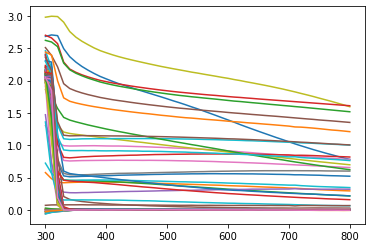

In [5]:
spectras = full_spectra
for i, spec in spectras.iterrows():
    spec = list(spec)
    plt.plot(wavelengths, spec)

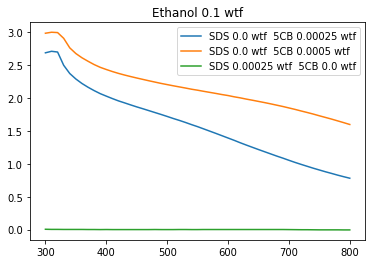

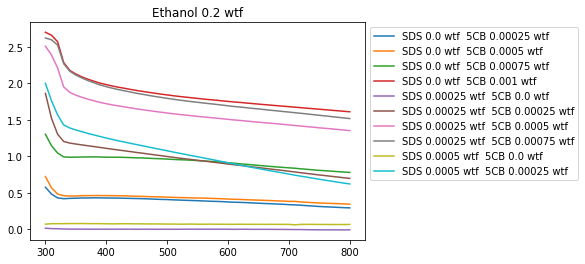

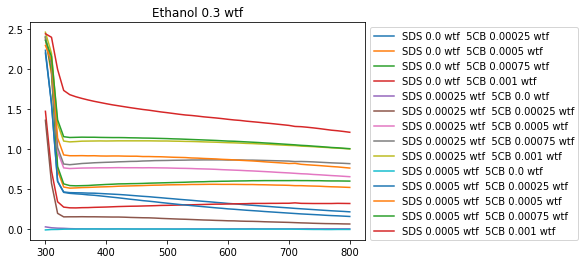

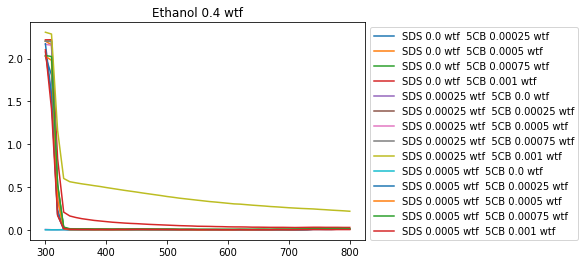

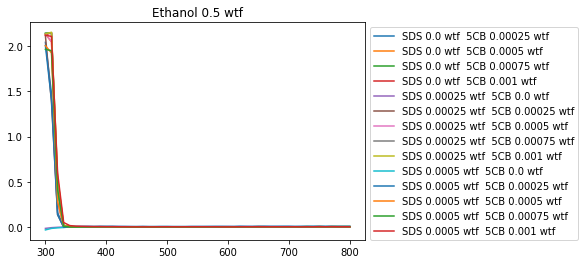

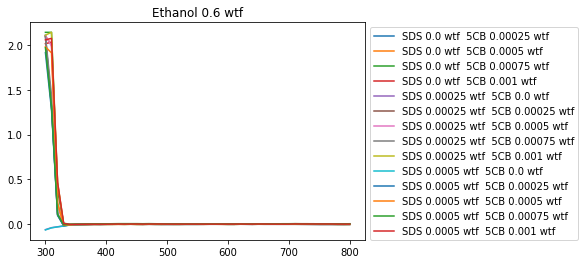

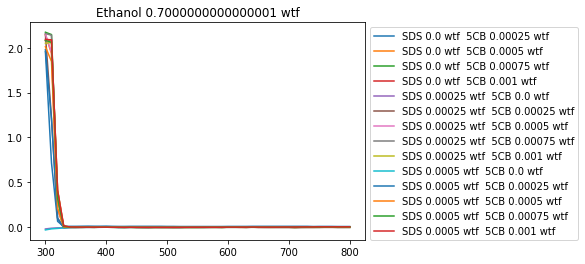

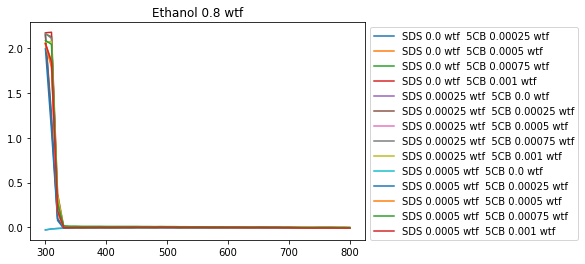

In [32]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
    fig, ax = plt.subplots()
    ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    for i, row in group.iterrows():
        spectra = list(row[wavelength_columns])
        sds_label = 'SDS ' + str(row['SDS concentration wtf']) + ' wtf' + '  5CB ' + str(row['5CB concentration wtf']) + ' wtf'
        ax.plot(wavelengths, spectra, label = sds_label)
    ax.legend(bbox_to_anchor=(1, 1))

In [ ]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
#     fig, ax = plt.subplots()
#     ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    
    cb_group = group.groupby('5CB concentration wtf')
    for cb, group_cb in cb_group: 
        fig, ax = plt.subplots()
        ax.set_title('Ethanol ' + str(etoh) + ' wtf' + '  5CB ' + str(cb) + ' wtf')
        for i, row in group_cb.iterrows():
            spectra = list(row[wavelength_columns])
            sds_label = 'SDS ' + str(row['SDS concentration wtf']) + ' wtf'
            ax.plot(wavelengths, spectra, label = sds_label)
        ax.legend(bbox_to_anchor=(1, 1))

In [36]:
etoh_group = full_data.groupby('ethanol concentration wtf')

for etoh, group in etoh_group:
#     fig, ax = plt.subplots()
#     ax.set_title('Ethanol ' + str(etoh) + ' wtf')
    
    cb_group = group.groupby('SDS concentration wtf')
    for cb, group_cb in cb_group: 
        fig, ax = plt.subplots()
        ax.set_title('Ethanol ' + str(etoh) + ' wtf' + '  SDS ' + str(cb) + ' wtf')
        for i, row in group_cb.iterrows():
            spectra = list(row[wavelength_columns])
            sds_label = '5CB ' + str(row['5CB concentration wtf']) + ' wtf'
            ax.plot(wavelengths, spectra, label = sds_label)
        ax.legend(bbox_to_anchor=(1, 1))

IndentationError: expected an indented block (<ipython-input-36-41710fc15c8f>, line 15)

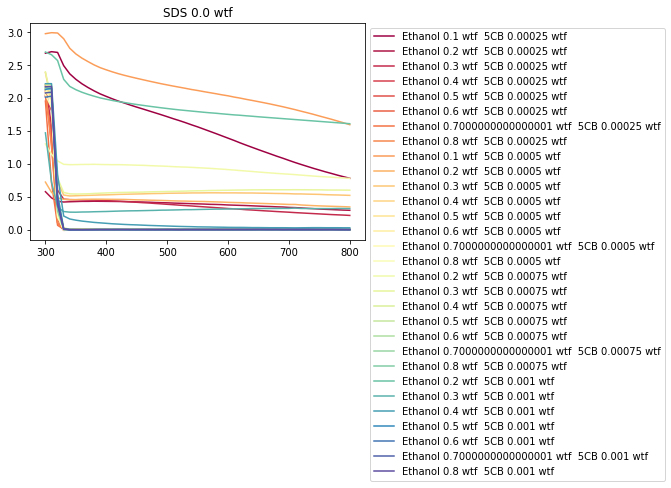

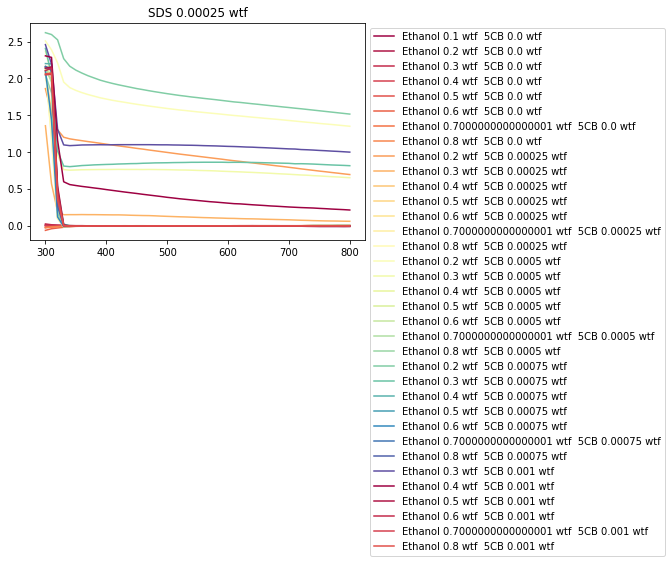

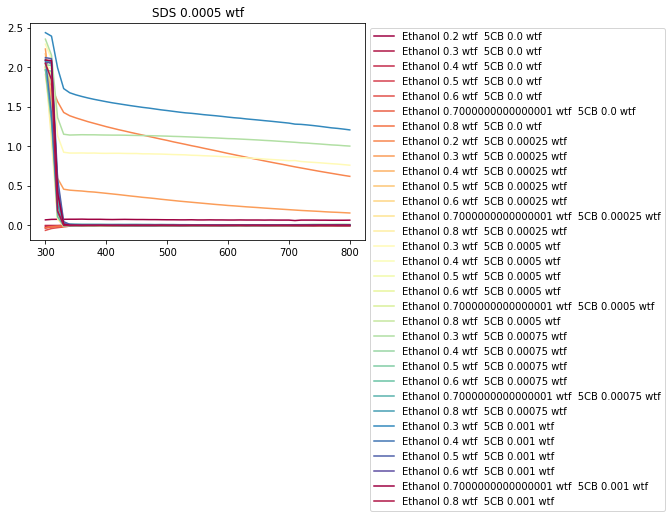

In [38]:
SDS_group = full_data.groupby('SDS concentration wtf')

for SDS, group in SDS_group:
    fig, ax = plt.subplots()
    ax.set_title('SDS ' + str(SDS) + ' wtf')
    ax.set_prop_cycle('color',plt.cm.Spectral(np.linspace(0,1,30)))
    for i, row in group.iterrows():
        # add subtplots so that the only thing changing in a graph is the ethanol?
        spectra = list(row[wavelength_columns])
        sds_label = 'Ethanol ' + str(row['ethanol concentration wtf']) + ' wtf' + '  5CB ' + str(row['5CB concentration wtf']) + ' wtf'
        ax.plot(wavelengths, spectra, label = sds_label)
    ax.legend(bbox_to_anchor=(1, 1))